# bike rentals regression

In [ ]:
### index feature has 100 categories

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from ast import literal_eval
from glob import glob

In [3]:
def get_results(exp, path):
    all_cols = cols = [ 'gain', 
       'shap_train', 'shap_test']
    our_cols = [ 'gain']
    cols = our_cols if exp.startswith('Ours') else all_cols
    df = pd.read_csv(path, converters = {col: literal_eval for col in cols})
    results = pd.DataFrame()
    for col in cols:
        results[col] = pd.Series(df.loc[0,col])
    return results

paths = {
    'Lgbm' :"lgbm/lgbm_vanilla.csv",
    'Catboost' :"catboost/catboost_vanilla.csv",
    "Ours_kfold" :"ours_Kfold/ours_kfold__.csv",
     "Ours_Vanilla" :"ours_vanilla/ours_vanilla__.csv",
    "Sklearn" : "sklearn/sklearn_mean_imputing.csv",
    'Xgboost': "xgboost/xgboost_mean_imputing.csv"
    
    
}

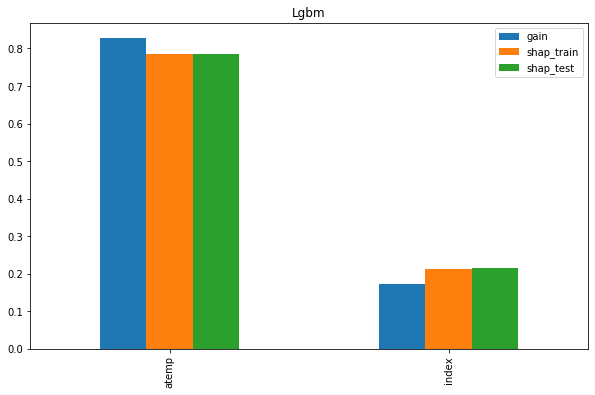

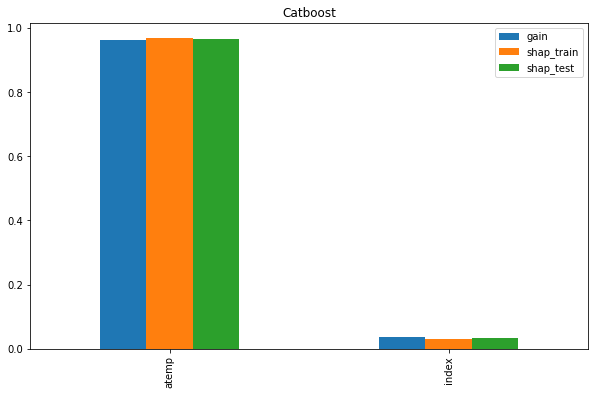

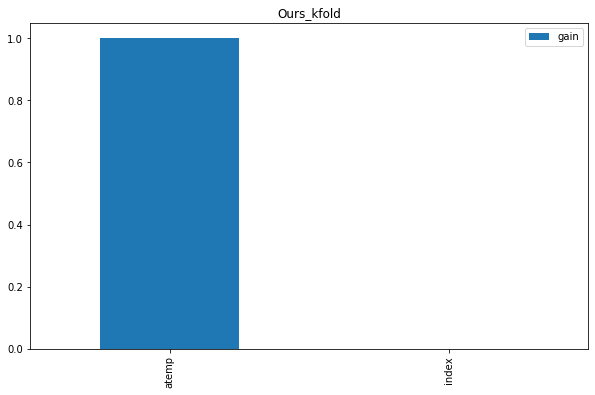

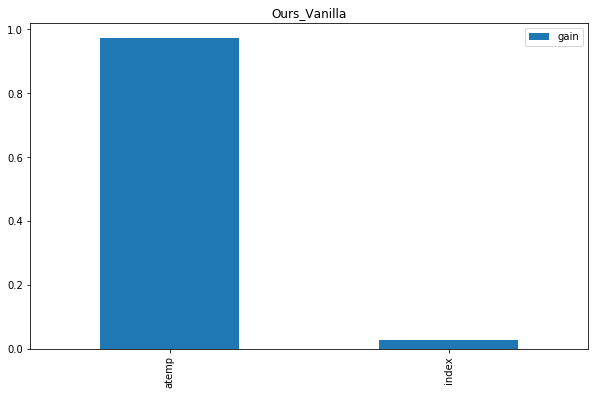

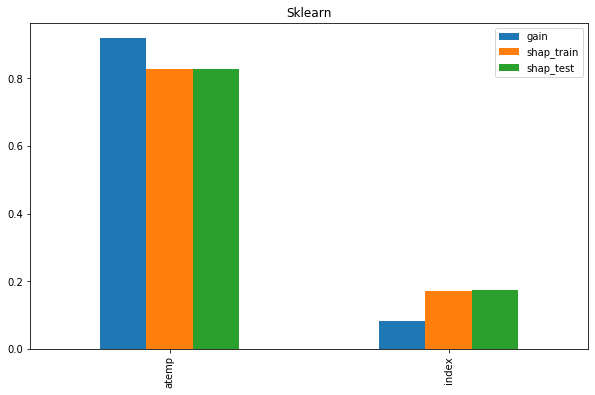

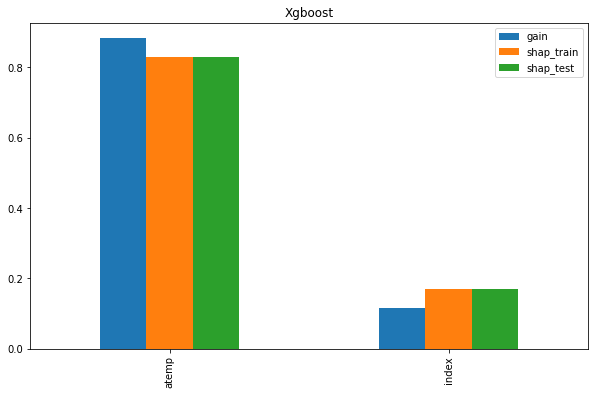

In [4]:
for k, v in paths.items():
    try: 
        results = get_results(k,v)
        results = results.sort_index()
        results.plot(kind = 'bar', figsize = (10,6), title = k)
        plt.plot()
    except:
        pass

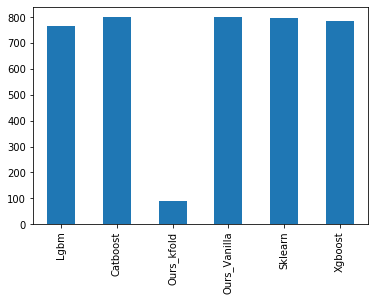

In [5]:
results = {}
for model, path in paths.items():
    results[model] = pd.read_csv(paths[model])['nleaves'][0]
pd.Series(results).plot(kind = 'bar')

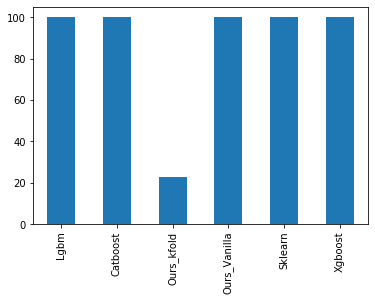

In [6]:
results = {}
for model, path in paths.items():
    results[model] = pd.read_csv(paths[model])['ntrees'][0]
pd.Series(results).plot(kind = 'bar')

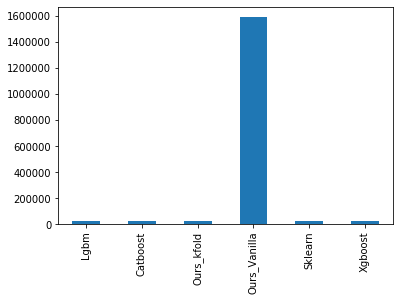

In [7]:
results = {}
for model, path in paths.items():
    results[model] = pd.read_csv(paths[model])['error'][0]
pd.Series(results).plot(kind = 'bar')